# Importing libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Make plots took nice*

In [4]:
plt.style.use("ggplot")
sns.set()
pd.set_option("display.max_columns",100)
RANDOM_STATE = 42

*Data Load*

In [8]:
app_df = pd.read_csv("application_data.csv")
prev_df = pd.read_csv("previous_application.csv")
desc_df = pd.read_csv("columns_description.csv",encoding="latin-1")

In [9]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [10]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
desc_df.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


**Taking a look of data**

In [12]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [16]:
app_df.describe().T

In [17]:
missing_pct = app_df.isnull().mean().sort_values(ascending=False) * 100

In [18]:
missing_df = missing_pct.reset_index()
missing_df.columns = ["column", "missing_percent"]

In [19]:
missing_df.head(30)

,column,missing_percent
0,COMMONAREA_AVG,69.872297
1,COMMONAREA_MODE,69.872297
2,COMMONAREA_MEDI,69.872297
3,NONLIVINGAPARTMENTS_MEDI,69.432963
4,NONLIVINGAPARTMENTS_MODE,69.432963
5,NONLIVINGAPARTMENTS_AVG,69.432963
6,FONDKAPREMONT_MODE,68.386172
7,LIVINGAPARTMENTS_AVG,68.354953
8,LIVINGAPARTMENTS_MEDI,68.354953
9,LIVINGAPARTMENTS_MODE,68.354953


*Drop columns with too many missing values*

In [20]:
HIGH_MISS_THRESH = 40
high_missing_cols = missing_df[missing_df["missing_percent"] > HIGH_MISS_THRESH]["column"].tolist()


In [21]:
print("\nNumber of columns with >40% missing:", len(high_missing_cols))
print("Columns dropped (high missingness):")
print(high_missing_cols)


Number of columns with >40% missing: 49
Columns dropped (high missingness):
['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'LANDAREA_MODE', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION

In [22]:
app_df_reduced = app_df.drop(columns=high_missing_cols)
print("\nShape after dropping high-missing columns:", app_df_reduced.shape)


Shape after dropping high-missing columns: (307511, 73)


In [23]:
num_cols = app_df_reduced.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = app_df_reduced.select_dtypes(exclude=[np.number]).columns.tolist()

*Impute missing value with median and mode*

In [24]:
# Numeric: median
for col in num_cols:
    if app_df_reduced[col].isnull().any():
        app_df_reduced[col].fillna(app_df_reduced[col].median(), inplace=True)

# Categorical: mode
for col in cat_cols:
    if app_df_reduced[col].isnull().any():
        app_df_reduced[col].fillna(app_df_reduced[col].mode()[0], inplace=True)

print("\nTotal remaining missing values:", app_df_reduced.isnull().sum().sum())

C:\Users\HP\AppData\Local\Temp\ipykernel_22280\2296379437.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_df_reduced[col].fillna(app_df_reduced[col].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_22280\2296379437.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 


Total remaining missing values: 0


In [25]:
candidate_num_cols = [
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED"
]
candidate_num_cols = [c for c in candidate_num_cols if c in app_df_reduced.columns]

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (series < lower_bound) | (series > upper_bound)
    return mask, lower_bound, upper_bound

outlier_summary = {}

for col in candidate_num_cols:
    mask, lb, ub = detect_outliers_iqr(app_df_reduced[col])
    n_outliers = mask.sum()
    outlier_summary[col] = {
        "outlier_count": int(n_outliers),
        "outlier_percent": float(n_outliers / len(app_df_reduced) * 100),
        "lower_bound": float(lb),
        "upper_bound": float(ub),
    }

print("\n--- OUTLIER SUMMARY (IQR method) ---")
for col, info in outlier_summary.items():
    print(f"{col}: {info['outlier_count']} outliers ({info['outlier_percent']:.2f}%)")
    print(f"    LB={info['lower_bound']:.2f}, UB={info['upper_bound']:.2f}")


--- OUTLIER SUMMARY (IQR method) ---
AMT_INCOME_TOTAL: 14035 outliers (4.56%)
    LB=-22500.00, UB=337500.00
AMT_CREDIT: 6562 outliers (2.13%)
    LB=-537975.00, UB=1616625.00
AMT_ANNUITY: 7504 outliers (2.44%)
    LB=-10584.00, UB=61704.00
AMT_GOODS_PRICE: 14728 outliers (4.79%)
    LB=-423000.00, UB=1341000.00
DAYS_BIRTH: 0 outliers (0.00%)
    LB=-30585.50, UB=-1509.50
DAYS_EMPLOYED: 72217 outliers (23.48%)
    LB=-6466.50, UB=3417.50


*Graph to show the outliers*

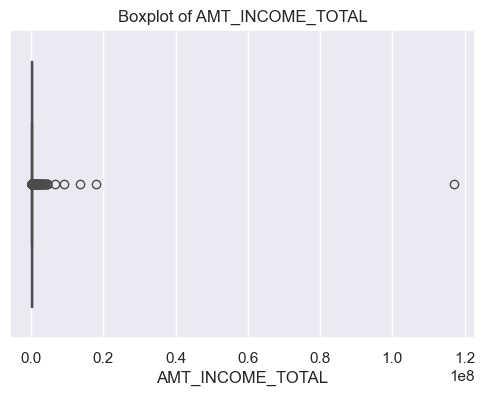

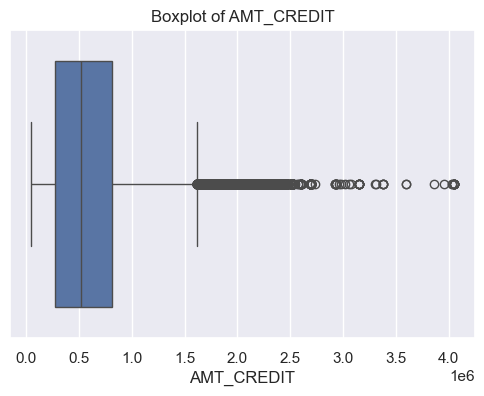

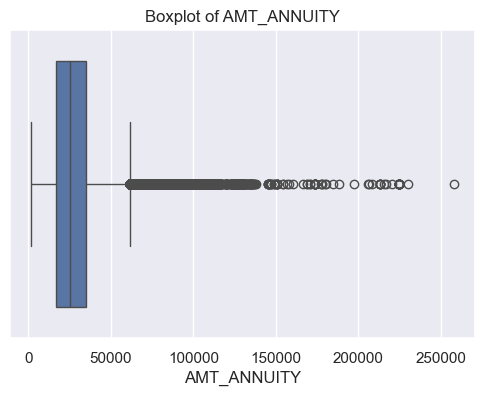

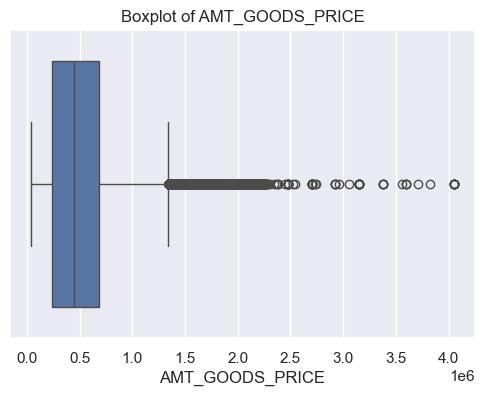

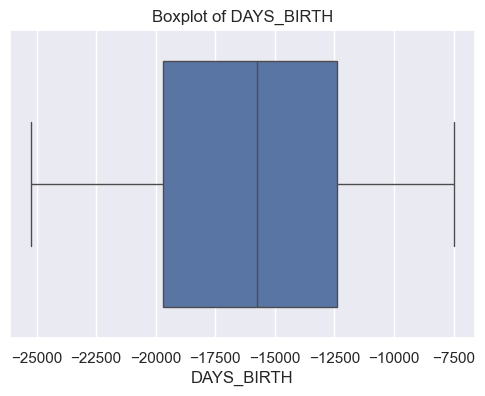

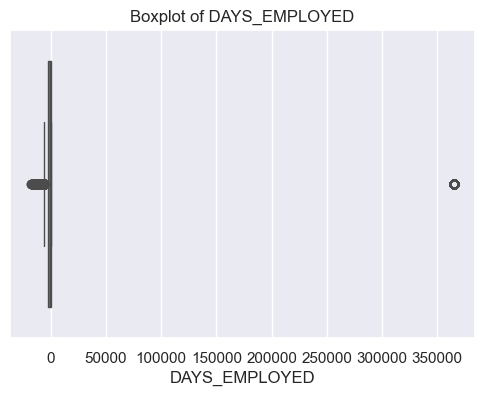

In [26]:
# Boxplots
for col in candidate_num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=app_df_reduced[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

*Class imbalance*


--- TARGET DISTRIBUTION (Counts) ---
TARGET
0    282686
1     24825
Name: count, dtype: int64

--- TARGET DISTRIBUTION (Ratio) ---
TARGET
0    0.919271
1    0.080729
Name: count, dtype: float64


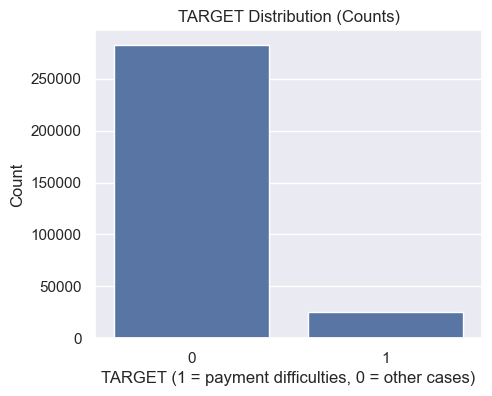

In [27]:
target_counts = app_df_reduced["TARGET"].value_counts()
target_ratio = target_counts / target_counts.sum()

print("\n--- TARGET DISTRIBUTION (Counts) ---")
print(target_counts)

print("\n--- TARGET DISTRIBUTION (Ratio) ---")
print(target_ratio)

plt.figure(figsize=(5, 4))
sns.countplot(x="TARGET", data=app_df_reduced)
plt.title("TARGET Distribution (Counts)")
plt.xlabel("TARGET (1 = payment difficulties, 0 = other cases)")
plt.ylabel("Count")
plt.show()

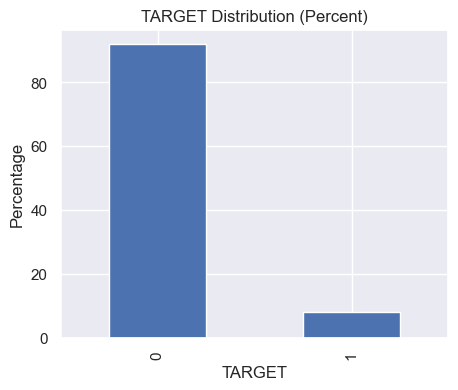

In [29]:
plt.figure(figsize=(5, 4))
(target_ratio * 100).plot(kind="bar")
plt.title("TARGET Distribution (Percent)")
plt.xlabel("TARGET")
plt.ylabel("Percentage")
plt.show()

**Univariant Analysis**

In [ ]:
# Create Age feature from DAYS_BIRTH (negative days from today)
if "DAYS_BIRTH" in app_df_reduced.columns:
    app_df_reduced["AGE_YEARS"] = (-app_df_reduced["DAYS_BIRTH"] / 365).round(1)

num_cols_for_eda = [
    "AGE_YEARS",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE"
]
num_cols_for_eda = [c for c in num_cols_for_eda if c in app_df_reduced.columns]

cat_cols_for_eda = [
    "NAME_CONTRACT_TYPE",
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE"
]
cat_cols_for_eda = [c for c in cat_cols_for_eda if c in app_df_reduced.columns]

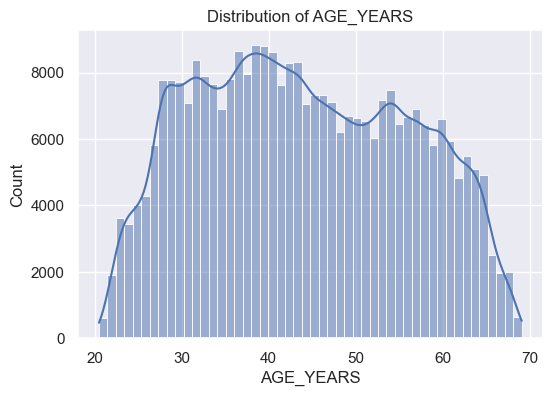

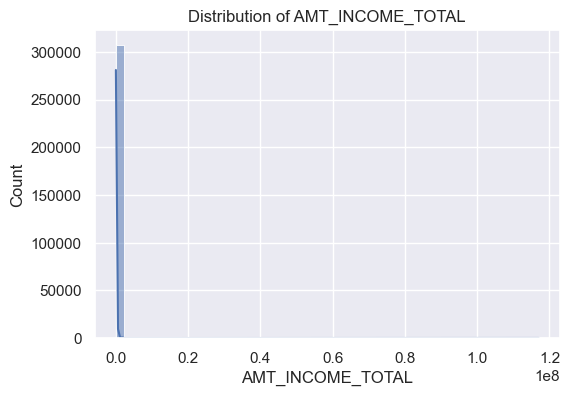

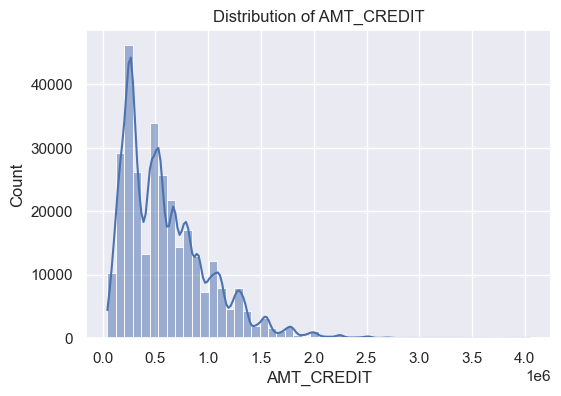

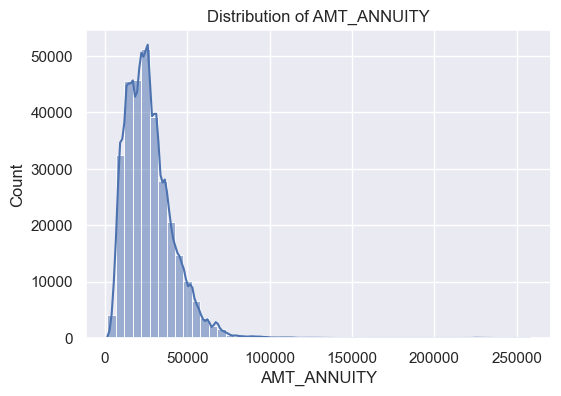

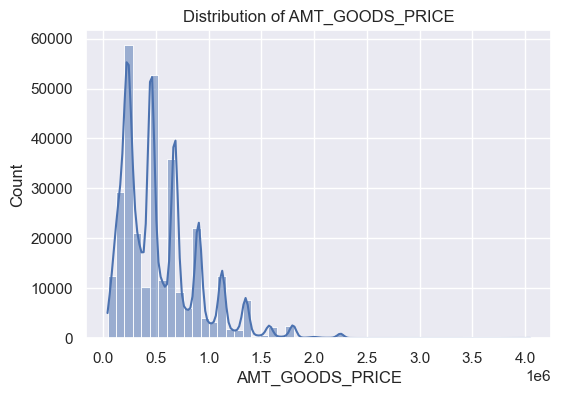

In [31]:
for col in num_cols_for_eda:
    plt.figure(figsize=(6, 4))
    sns.histplot(app_df_reduced[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
    plt.show()

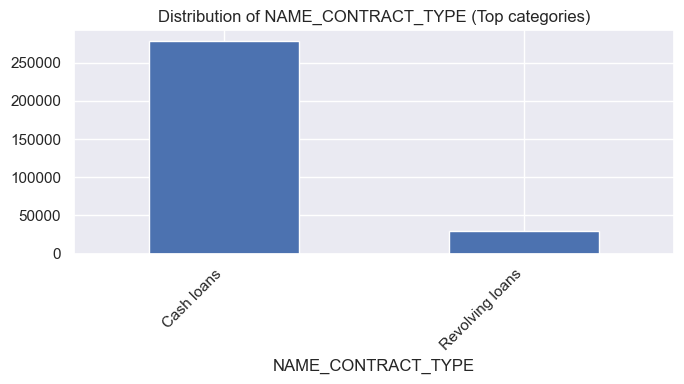

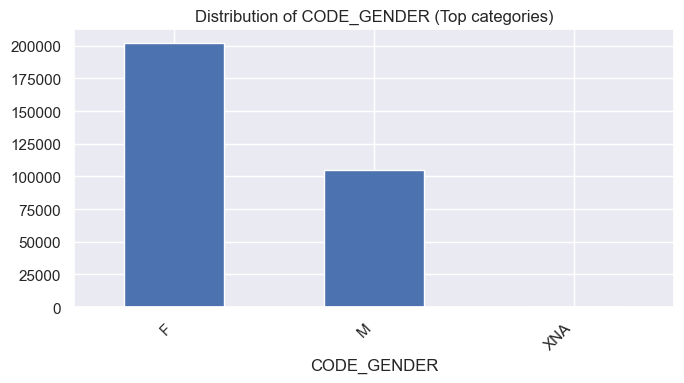

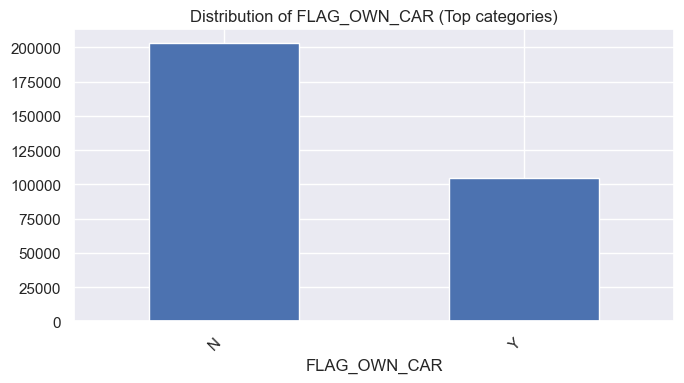

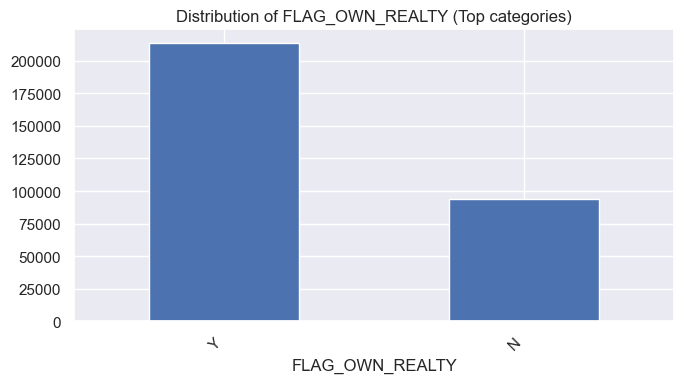

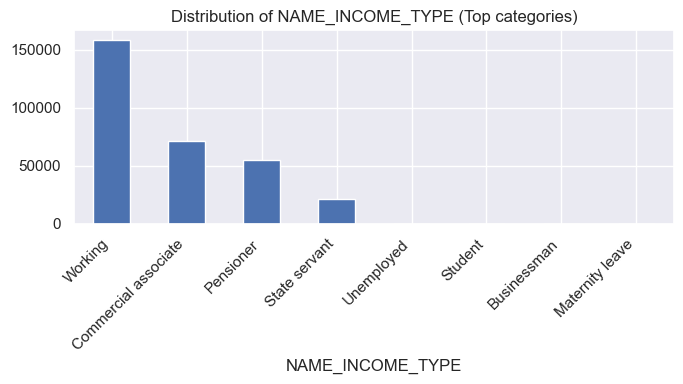

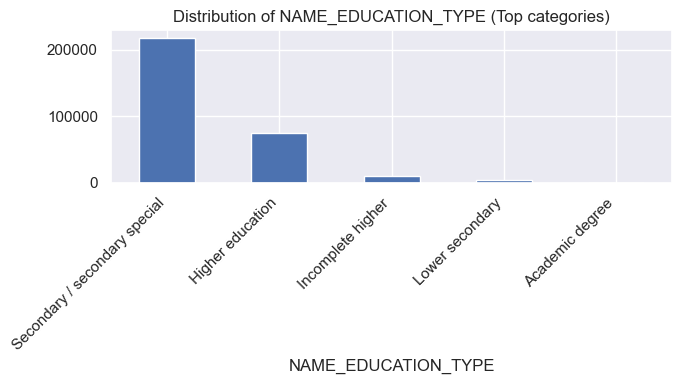

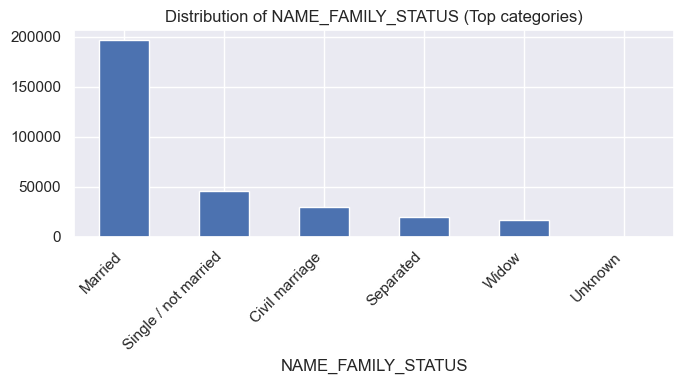

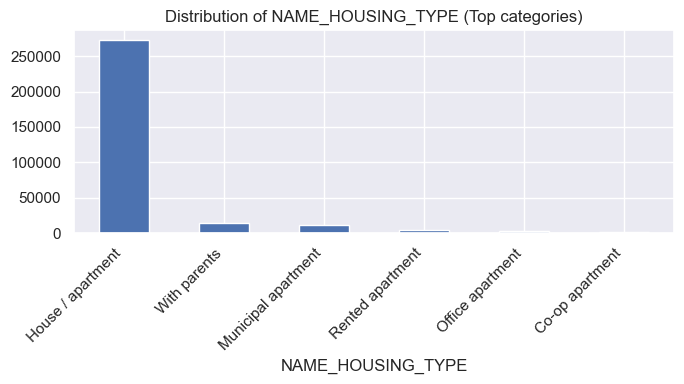

In [32]:
# Categorical: bar charts
for col in cat_cols_for_eda:
    plt.figure(figsize=(7, 4))
    app_df_reduced[col].value_counts().head(15).plot(kind="bar")
    plt.title(f"Distribution of {col} (Top categories)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

*Segmented Univariant Analysis*

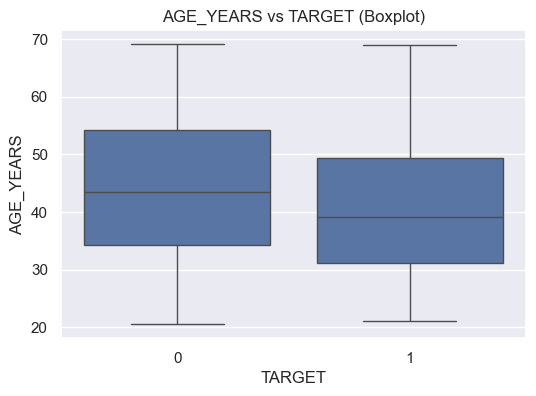

C:\Users\HP\AppData\Local\Temp\ipykernel_22280\1783596131.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_22280\1783596131.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


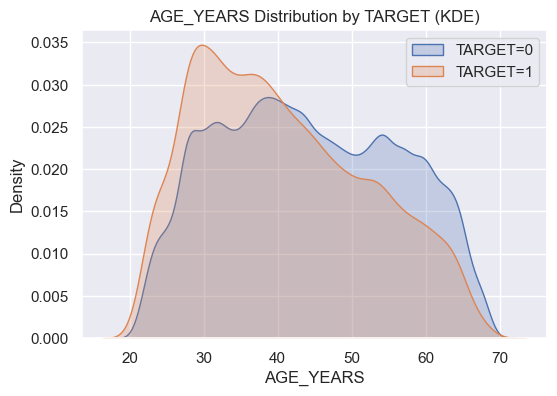

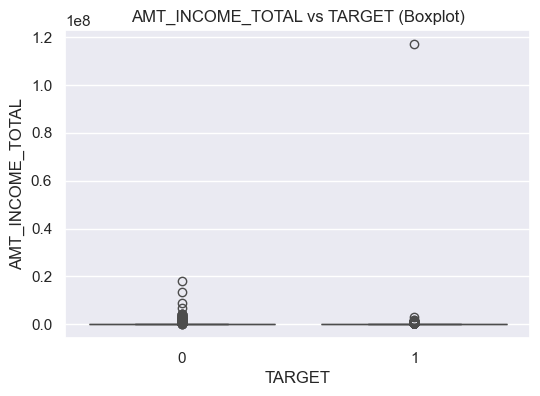

C:\Users\HP\AppData\Local\Temp\ipykernel_22280\1783596131.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_22280\1783596131.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


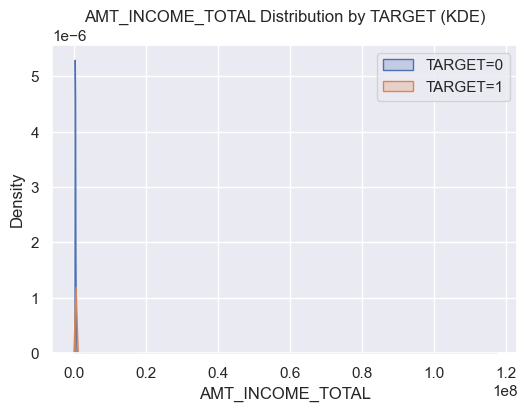

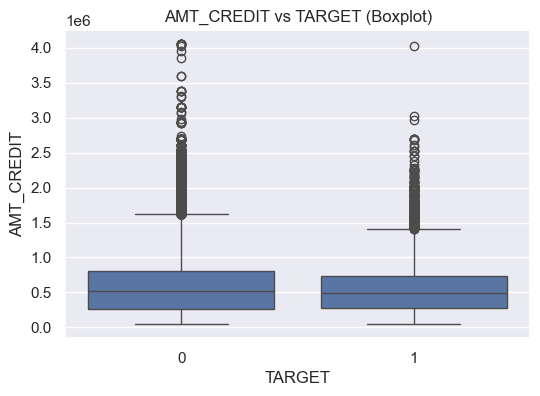

C:\Users\HP\AppData\Local\Temp\ipykernel_22280\1783596131.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_22280\1783596131.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


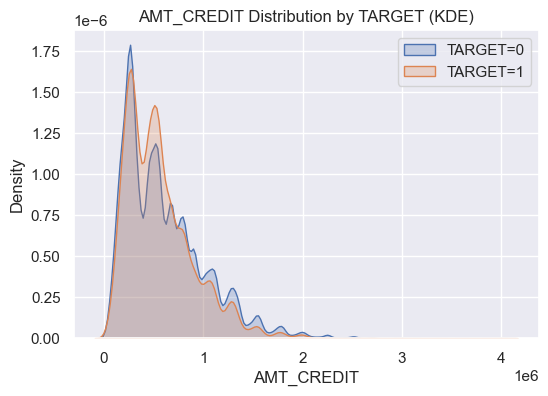

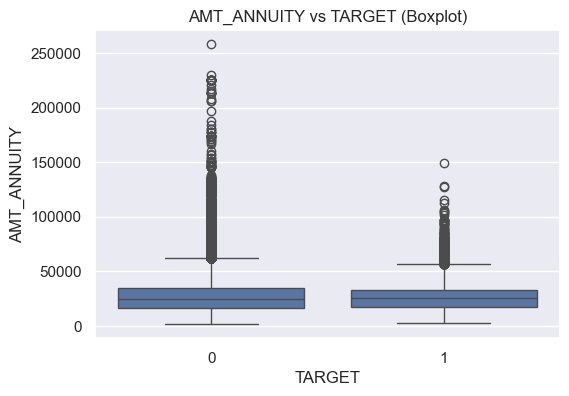

C:\Users\HP\AppData\Local\Temp\ipykernel_22280\1783596131.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_22280\1783596131.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


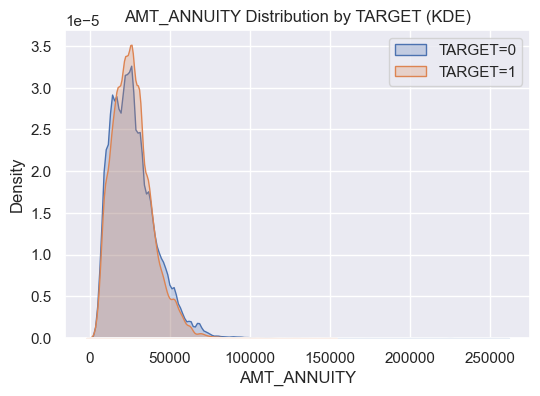

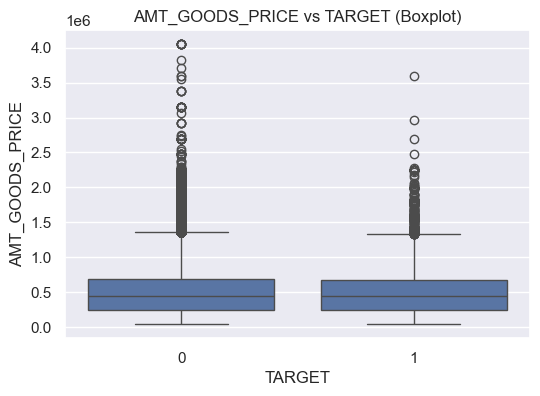

C:\Users\HP\AppData\Local\Temp\ipykernel_22280\1783596131.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_22280\1783596131.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


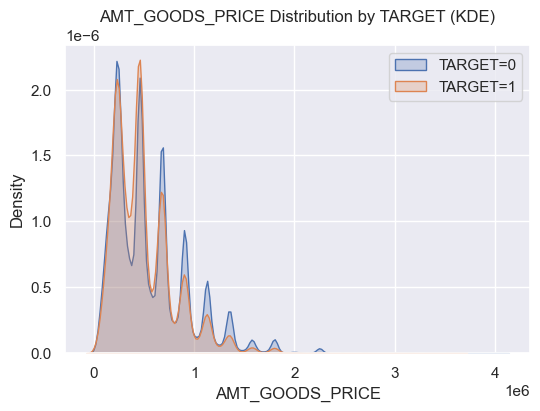

In [33]:
# Numeric vs TARGET
for col in num_cols_for_eda:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=app_df_reduced, x="TARGET", y=col)
    plt.title(f"{col} vs TARGET (Boxplot)")
    plt.show()

    plt.figure(figsize=(6, 4))
    for t in sorted(app_df_reduced["TARGET"].unique()):
        sns.kdeplot(
            app_df_reduced.loc[app_df_reduced["TARGET"] == t, col],
            label=f"TARGET={t}",
            shade=True
        )
    plt.title(f"{col} Distribution by TARGET (KDE)")
    plt.legend()
    plt.show()

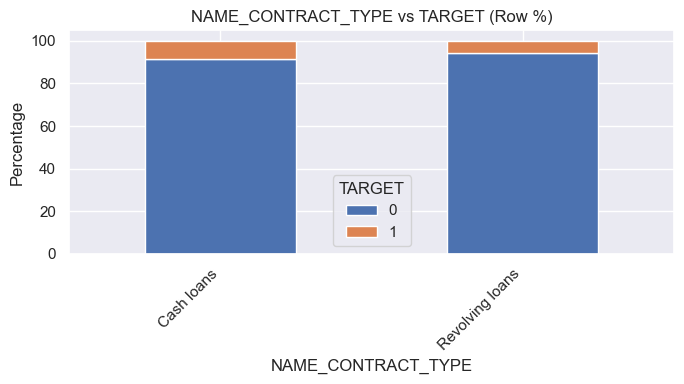

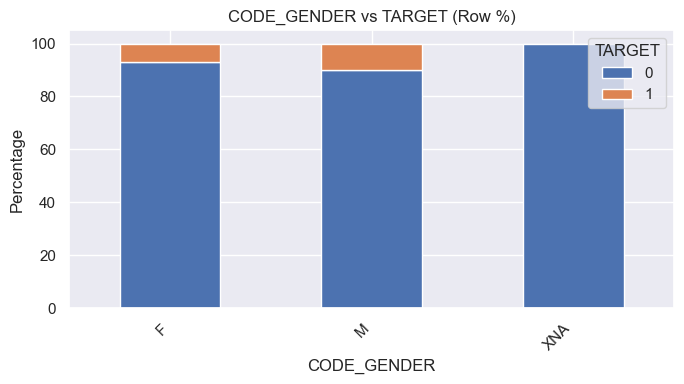

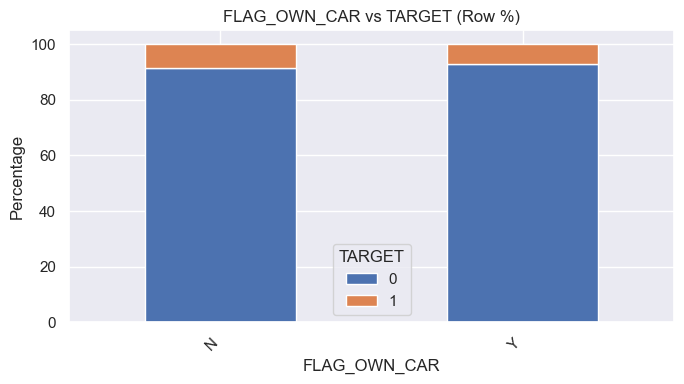

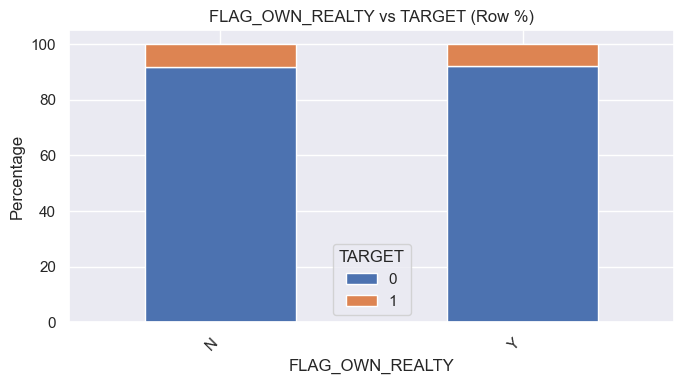

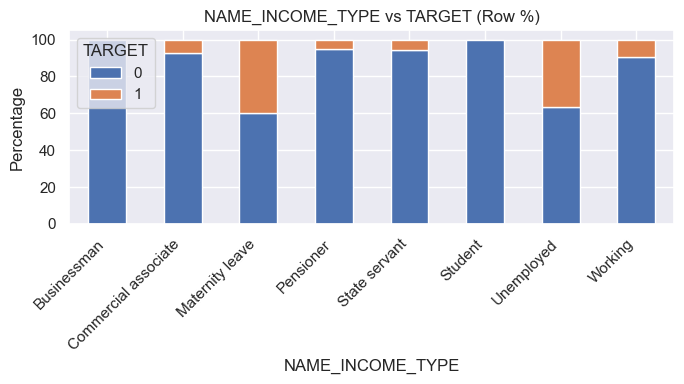

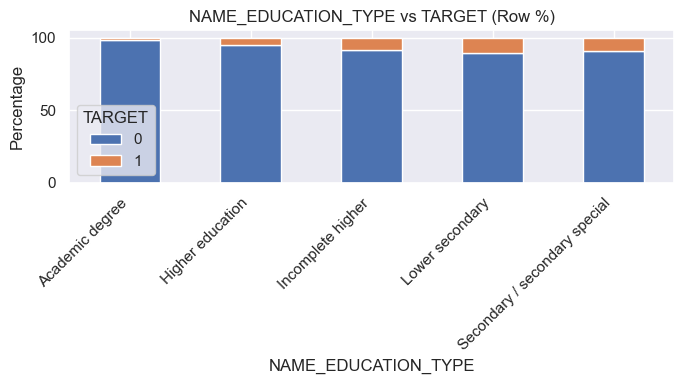

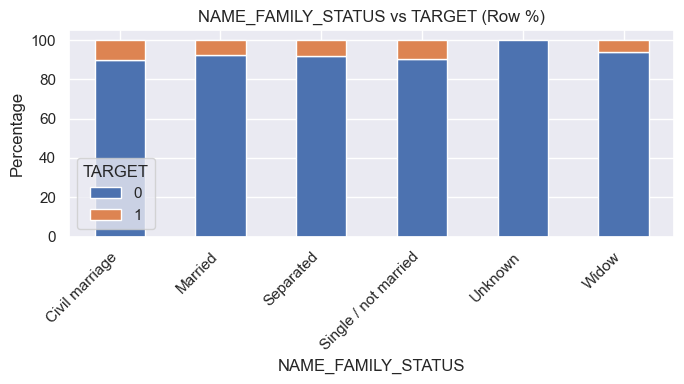

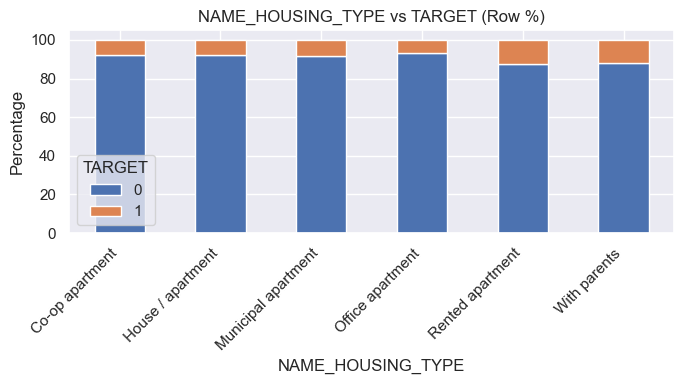

In [35]:
# Categorical vs TARGET – stacked row % bar charts
for col in cat_cols_for_eda:
    ct = pd.crosstab(app_df_reduced[col], app_df_reduced["TARGET"], normalize="index") * 100
    ct.plot(kind="bar", stacked=True, figsize=(7, 4))
    plt.title(f"{col} vs TARGET (Row %)")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="TARGET")
    plt.tight_layout()
    plt.show()

**Bivariant Analysis**

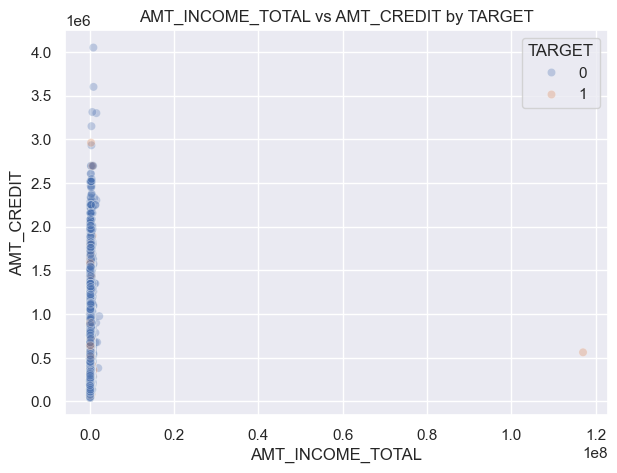


--- GROUPED NUMERIC STATS BY TARGET ---


AGE_YEARS                    AMT_INCOME_TOTAL                     \
             mean median   min   max             mean    median      min   
TARGET                                                                     
0       44.214191   43.5  20.5  69.1    169077.722266  148500.0  25650.0   
1       40.780483   39.1  21.0  69.0    165611.760906  135000.0  25650.0   

                        AMT_CREDIT                                \
                max           mean    median      min        max   
TARGET                                                             
0        18000090.0  602648.282002  517788.0  45000.0  4050000.0   
1       117000000.0  557778.527674  497520.0  45000.0  4027680.0   

         AMT_ANNUITY                            AMT_GOODS_PRICE            \
                mean   median     min       max            mean    median   
TARGET                                                                      
0       27163.527386  24876.0  1615.5  258025.5   542652.484651  450000.0   
1       26481.744290  25263.0  2722.5  149211.0   488939.444955  450000.0   

                            
            min        max  
TARGET                      
0       40500.0  4050000.0  
1       45000.0  3600000.0

In [37]:
# Example scatter: income vs credit colored by TARGET
if {"AMT_INCOME_TOTAL", "AMT_CREDIT", "TARGET"}.issubset(app_df_reduced.columns):
    sample_df = app_df_reduced.sample(
        n=min(20000, len(app_df_reduced)),
        random_state=RANDOM_STATE
    )
    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        data=sample_df,
        x="AMT_INCOME_TOTAL",
        y="AMT_CREDIT",
        hue="TARGET",
        alpha=0.3
    )
    plt.title("AMT_INCOME_TOTAL vs AMT_CREDIT by TARGET")
    plt.show()
    # Grouped numeric stats by TARGET
group_stats = app_df_reduced.groupby("TARGET")[num_cols_for_eda].agg(["mean", "median", "min", "max"])
print("\n--- GROUPED NUMERIC STATS BY TARGET ---")
display(group_stats)

**Correlation Analysis**

In [38]:
## 10. Correlation Analysis
numeric_cols = app_df_reduced.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols_no_target = [c for c in numeric_cols if c != "TARGET"]

df_bad = app_df_reduced[app_df_reduced["TARGET"] == 1][numeric_cols_no_target]
df_good = app_df_reduced[app_df_reduced["TARGET"] == 0][numeric_cols_no_target]

def top_correlations(df, top_n=10):
    corr_matrix = df.corr()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    corr_pairs = (
        upper.stack()
        .reset_index()
        .rename(columns={"level_0": "var1", "level_1": "var2", 0: "corr"})
    )
    corr_pairs["abs_corr"] = corr_pairs["corr"].abs()
    return corr_pairs.sort_values("abs_corr", ascending=False).head(top_n)

print("\n--- TOP 10 CORRELATIONS (TARGET=1) ---")
top_corr_bad = top_correlations(df_bad, top_n=10)
display(top_corr_bad)

print("\n--- TOP 10 CORRELATIONS (TARGET=0) ---")
top_corr_good = top_correlations(df_good, top_n=10)
display(top_corr_good)

def plot_corr_heatmap(df, vars_list, title="Correlation Heatmap"):
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[vars_list].corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(title)
    plt.show()


--- TOP 10 CORRELATIONS (TARGET=1) ---


,var1,var2,corr,abs_corr
419,DAYS_BIRTH,AGE_YEARS,-0.999997,0.999997
422,DAYS_EMPLOYED,FLAG_EMP_PHONE,-0.999702,0.999702
1191,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998270,0.998270
166,AMT_CREDIT,AMT_GOODS_PRICE,0.982783,0.982783
816,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.956637,0.956637
70,CNT_CHILDREN,CNT_FAM_MEMBERS,0.885484,0.885484
1219,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.869016,0.869016
966,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,0.847885,0.847885
1068,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,0.778540,0.778540
218,AMT_ANNUITY,AMT_GOODS_PRICE,0.752295,0.752295



--- TOP 10 CORRELATIONS (TARGET=0) ---


,var1,var2,corr,abs_corr
451,DAYS_BIRTH,AGE_YEARS,-0.999997,0.999997
455,DAYS_EMPLOYED,FLAG_EMP_PHONE,-0.999758,0.999758
1335,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998510,0.998510
178,AMT_CREDIT,AMT_GOODS_PRICE,0.987022,0.987022
927,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950149,0.950149
75,CNT_CHILDREN,CNT_FAM_MEMBERS,0.878571,0.878571
1089,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,0.861861,0.861861
1366,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.859371,0.859371
1200,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,0.830381,0.830381
234,AMT_ANNUITY,AMT_GOODS_PRICE,0.776421,0.776421


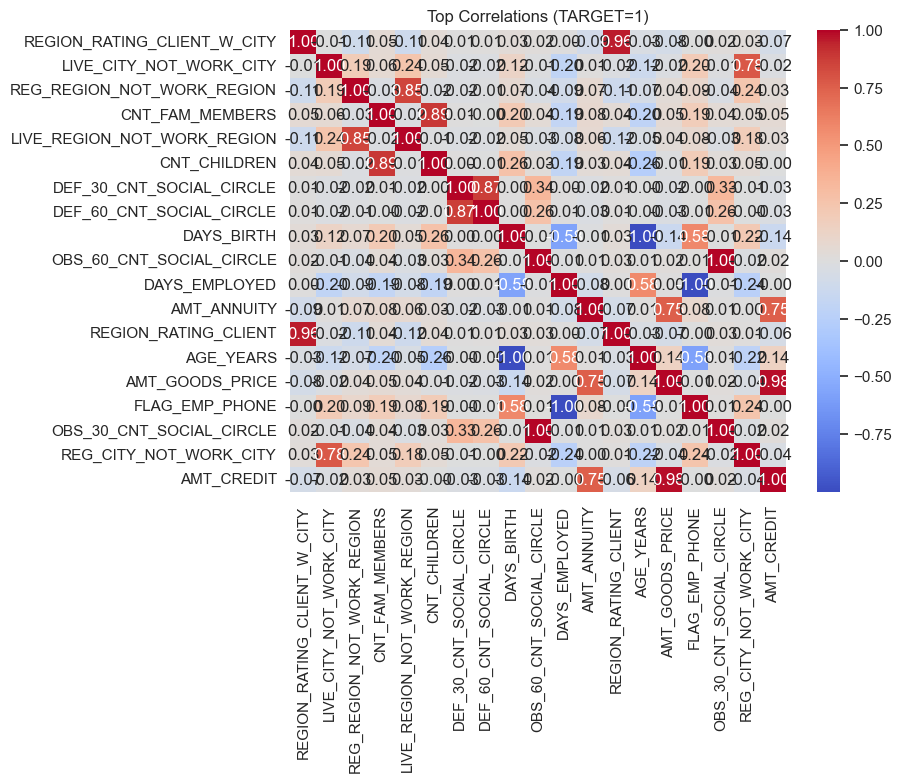

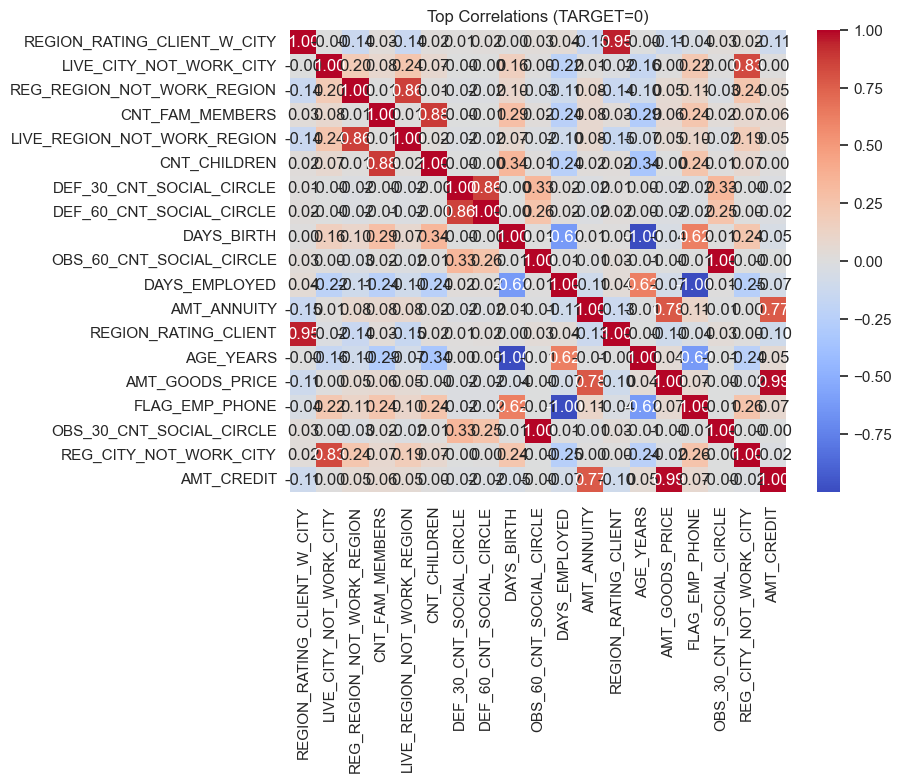

In [43]:
# Heatmap for TARGET=1
vars_bad = list(set(top_corr_bad["var1"]).union(set(top_corr_bad["var2"])))
if len(vars_bad) > 1:
    plot_corr_heatmap(df_bad, vars_bad, title="Top Correlations (TARGET=1)")

# Heatmap for TARGET=0
vars_good = list(set(top_corr_good["var1"]).union(set(top_corr_good["var2"])))
if len(vars_good) > 1:
    plot_corr_heatmap(df_good, vars_good, title="Top Correlations (TARGET=0)")

**Previous Application Data Analysis**


--- PREVIOUS APPLICATION CONTRACT STATUS (Counts) ---


NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64

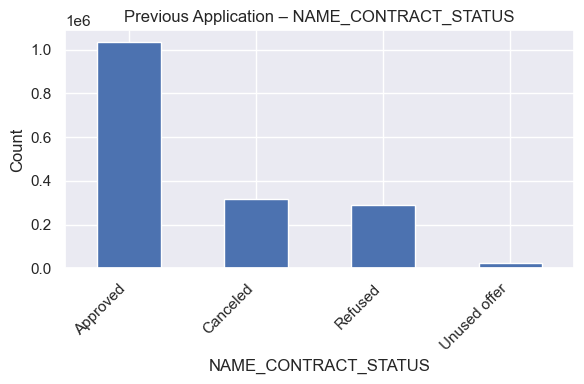

In [40]:
# Previous Applications Analysis (Code)
if "NAME_CONTRACT_STATUS" in prev_df.columns:
    print("\n--- PREVIOUS APPLICATION CONTRACT STATUS (Counts) ---")
    status_counts = prev_df["NAME_CONTRACT_STATUS"].value_counts()
    display(status_counts)

    plt.figure(figsize=(6, 4))
    status_counts.plot(kind="bar")
    plt.title("Previous Application – NAME_CONTRACT_STATUS")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

<Figure size 800x500 with 0 Axes>

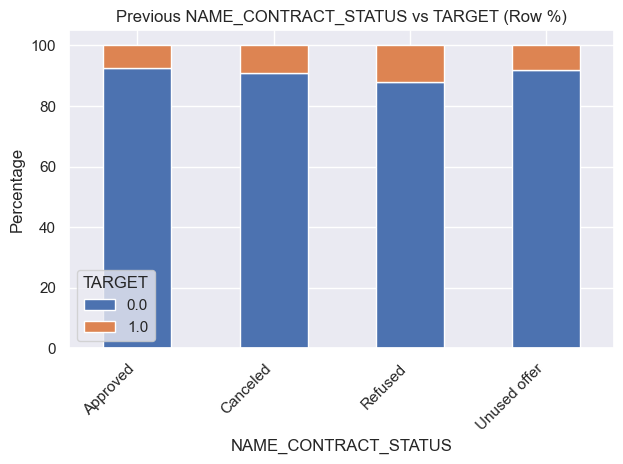

In [41]:
# Join with TARGET using SK_ID_CURR if available
if {"SK_ID_CURR", "TARGET"}.issubset(app_df_reduced.columns) and "SK_ID_CURR" in prev_df.columns:
    merged_prev = prev_df.merge(
        app_df_reduced[["SK_ID_CURR", "TARGET"]],
        on="SK_ID_CURR",
        how="left"
    )

    if "TARGET" in merged_prev.columns and "NAME_CONTRACT_STATUS" in merged_prev.columns:
        ct_prev = pd.crosstab(
            merged_prev["NAME_CONTRACT_STATUS"], 
            merged_prev["TARGET"], 
            normalize="index"
        ) * 100

        plt.figure(figsize=(8, 5))
        ct_prev.plot(kind="bar", stacked=True)
        plt.title("Previous NAME_CONTRACT_STATUS vs TARGET (Row %)")
        plt.ylabel("Percentage")
        plt.xticks(rotation=45, ha="right")
        plt.legend(title="TARGET")
        plt.tight_layout()
        plt.show()

# Conclusions (Markdown)
## Key Insights & Conclusions

Summarize your findings here:

- **Data Quality:**  
  - Missing value issues and how you handled them  
  - Outliers and whether you treated them or just noted them  

- **Target & Class Imbalance:**  
  - Default rate (TARGET=1)  
  - Is resampling needed in modeling (future step)?  

- **Important Patterns:**  
  - Age and default risk  
  - Income/Credit patterns  
  - Key categorical variables linked with higher risk  

- **Previous Applications:**  
  - Relationship between past application status and current default  
  - Any clear risk indicators from previous applications  
